In [3]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import pandas as pd

In [4]:
dataset_train=pd.read_excel('oil.xlsx') #excle データをインポート

In [5]:
dataset_train

,t h,Req MΩ,Ceq pF,DFeq,Req pu,Ceq pu,Dfeq pu,ANN output
0,24,295.2,287.8,1.88,1.067,1.10,1.03,good
1,48,256.5,290.8,2.03,0.927,1.11,1.11,good
2,84,238.6,293.7,2.07,0.863,1.12,1.13,good
3,120,217.4,297.7,2.11,0.786,1.13,1.16,good
4,156,195.6,304.3,2.11,0.707,1.16,1.15,good
5,192,192.5,303.5,2.17,0.696,1.16,1.19,good
6,228,183.7,302.9,2.30,0.664,1.15,1.26,good
7,264,184.0,307.1,2.15,0.665,1.17,1.18,good
8,300,38.2,300.5,3.95,0.138,1.14,2.16,oil
9,336,23.7,306.9,3.97,0.086,1.17,2.17,oil


In [6]:
# import some data to play with
X = dataset_train.drop(['t h','Req MΩ','Ceq pF','DFeq','ANN output'],axis=1) 
y = dataset_train['t h'] 

In [7]:
X

,Req pu,Ceq pu,Dfeq pu
0,1.067,1.10,1.03
1,0.927,1.11,1.11
2,0.863,1.12,1.13
3,0.786,1.13,1.16
4,0.707,1.16,1.15
5,0.696,1.16,1.19
6,0.664,1.15,1.26
7,0.665,1.17,1.18
8,0.138,1.14,2.16
9,0.086,1.17,2.17


In [8]:
from sklearn.linear_model import LinearRegression
import numpy as np

model_lr = LinearRegression()
model_lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
print(model_lr.coef_)
print(model_lr.intercept_)
print(model_lr.score(X, y))

[ -4.03422596 480.48826497 143.75388635]
-579.2904634734967
0.9922547073585097


In [10]:
predict_result = model_lr.predict(X)

In [11]:
predict_result

array([  93.00861184,  109.87859703,  117.81674787,  127.24488251,
        140.54069545,  146.33522739,  151.72221201,  149.82763218,
        278.41782993,  294.47979649,  385.35695107,  396.37306437,
        493.97978935,  497.31190805,  561.54519888,  658.65158935,
        711.02110089,  773.38696853,  833.88944719,  902.98596817,
       1043.175231  , 1202.95447833, 1244.68639891, 1325.68890977,
       1375.77124834, 1554.53043615, 1593.34398547, 1678.35910921,
       1737.71598427])

In [12]:
result = pd.DataFrame(y)
result['lr'] = predict_result
col_names = ['Experimental time data(t h)','Prediction time data']
result.columns=col_names
result

,Experimental time data(t h),Prediction time data
0,24,93.008612
1,48,109.878597
2,84,117.816748
3,120,127.244883
4,156,140.540695
5,192,146.335227
6,228,151.722212
7,264,149.827632
8,300,278.417830
9,336,294.479796


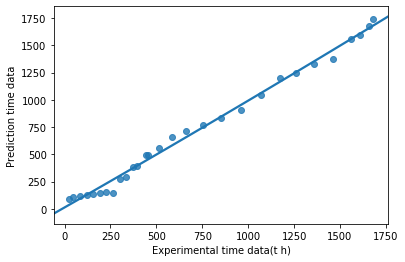

In [15]:
import seaborn as sns

sns.regplot(x="Experimental time data(t h)",y="Prediction time data",data=result, ci = 0, order = 2)

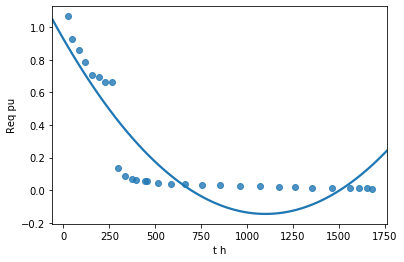

In [14]:
import seaborn as sns

sns.regplot(x="t h", y="Req pu",data=dataset_train, ci = 0, order = 2)

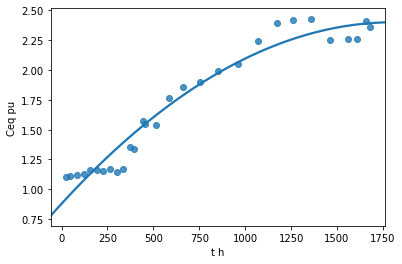

In [16]:
sns.regplot(x="t h", y="Ceq pu",data=dataset_train, ci = 0, order = 2)

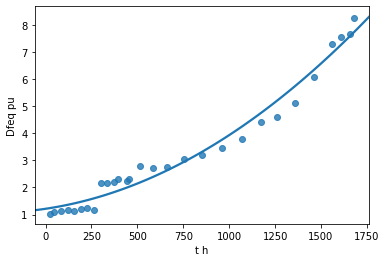

In [17]:
sns.regplot(x="t h", y="Dfeq pu",data=dataset_train, ci = 0, order = 2)

In [15]:
model_lr.coef_

array([ -4.03422596, 480.48826497, 143.75388635])

In [16]:
print('切片の値は{}'.format(model_lr.intercept_))

切片の値は-579.2904634734967
